In [18]:
import pandas as pd
articles=pd.read_csv("news_articles.csv")

In [19]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models,similarities
import gensim

In [20]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
en_stop.append('will')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [21]:
doc_set=articles['Content']
texts = []

In [22]:
ln=[]
for av in doc_set:
    ln.append(len(av))
tim=[]
for op in ln:
    tim.append(int(op/5))

In [23]:
for i in doc_set:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens1 = [p_stemmer.stem(i) for i in stopped_tokens]
    stemmed_tokens=[]
    for q in range(len(stemmed_tokens1)):
        if(len(stemmed_tokens1[q])!=1):
            stemmed_tokens.append(stemmed_tokens1[q])
        else:
            continue
       
    # add tokens to list
    texts.append(stemmed_tokens)

In [24]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [25]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=50, id2word = dictionary, passes=5)

In [26]:
Xx=[]   
for dox in corpus:
    c=ldamodel.get_document_topics(dox)
    Xx.append(c)

In [27]:
import numpy as np
x=np.zeros(shape=(4831,50))
x.shape

(4831, 50)

In [30]:
for i in range(4318):
    foc=Xx[i]
    for v in foc:
        x[i,v[0]]=v[1]
a = np.asarray(x)
np.savetxt("foo1.csv", a, delimiter=",")

In [31]:
ldamodel.print_topic(49)

'0.023*"tata" + 0.019*"said" + 0.017*"govern" + 0.012*"rajan" + 0.011*"land" + 0.010*"report" + 0.008*"pension" + 0.007*"state" + 0.007*"group" + 0.007*"institut"'

In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

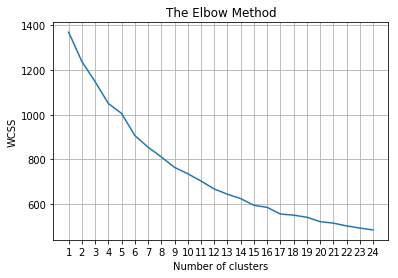

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 25), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 25))
plt.grid(True)
plt.show()

In [35]:
kmeans=KMeans(n_clusters = 7,init='k-means++',max_iter=300,n_init=10,random_state=0)
ykmeans=kmeans.fit(x)

In [36]:
from pandas import DataFrame

In [37]:
cluster_map = pd.DataFrame()
cluster_map['cluster'] = ykmeans.labels_

In [38]:
cluster1=articles['Article_Id'][ykmeans.labels_==0]
cluster2=articles['Article_Id'][ykmeans.labels_==1]
cluster3=articles['Article_Id'][ykmeans.labels_==2]
cluster4=articles['Article_Id'][ykmeans.labels_==3]
cluster5=articles['Article_Id'][ykmeans.labels_==4]
cluster6=articles['Article_Id'][ykmeans.labels_==5]
cluster7=articles['Article_Id'][ykmeans.labels_==6]
clusclus=[cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7]

# difference between two documents

In [39]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=7)

In [40]:
def thisdoc(doc):
    doc = doc
    vec_bow = dictionary.doc2bow(doc.lower().split())
    vec_lsi = lsi[vec_bow]
    return vec_lsi

In [41]:
corpus1=[corpus[i] for i in cluster1]
corpus2=[corpus[i] for i in cluster2]
corpus3=[corpus[i] for i in cluster3]
corpus4=[corpus[i] for i in cluster4]
corpus5=[corpus[i] for i in cluster5]
corpus6=[corpus[i] for i in cluster6]
corpus7=[corpus[i] for i in cluster7]
index1=similarities.MatrixSimilarity(lsi[corpus1])
index2=similarities.MatrixSimilarity(lsi[corpus2])
index3=similarities.MatrixSimilarity(lsi[corpus3])
index4=similarities.MatrixSimilarity(lsi[corpus4])
index5=similarities.MatrixSimilarity(lsi[corpus5])
index6=similarities.MatrixSimilarity(lsi[corpus6])
index7=similarities.MatrixSimilarity(lsi[corpus7])


F:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [42]:
index=similarities.MatrixSimilarity(lsi[corpus])

F:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [43]:
def diff1(vec):
    vec_lsi=thisdoc(vec)
    sims=index[vec_lsi]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    t=[]
    for i in range(len(sims)):
        t.append(sims[i][0])
    return t[:20]

In [44]:
def diff(clu,vec):
    vec_lsi=thisdoc(vec)
    sims=0
    if(clu==0):
            sims = index1[vec_lsi]
    if(clu==1):
            sims = index2[vec_lsi]
    if(clu==2):
            sims = index3[vec_lsi]
    if(clu==3):
            sims = index4[vec_lsi]
    if(clu==4):
            sims = index5[vec_lsi]
    if(clu==5):
            sims = index6[vec_lsi]
    if(clu==6):
            sims = index7[vec_lsi]
    
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    t=[]
    for i in range(len(sims)):
        t.append(sims[i][0])
    return t[:20]

# Generative model for Sessions
# Got 200 users with 1 session alloted to each one of them and being presented with 10 documents.

In [45]:
import random
from random import shuffle
def artselran():
    artli=[]
    artli.append(random.randint(np.min(np.array(cluster1)), np.max(np.array(cluster1))))
    artli.append(random.randint(np.min(np.array(cluster2)), np.max(np.array(cluster2))))
    artli.append(random.randint(np.min(np.array(cluster3)), np.max(np.array(cluster3))))
    artli.append(random.randint(np.min(np.array(cluster4)), np.max(np.array(cluster4))))
    artli.append(random.randint(np.min(np.array(cluster5)), np.max(np.array(cluster5))))
    artli.append(random.randint(np.min(np.array(cluster6)), np.max(np.array(cluster6))))
    artli.append(random.randint(np.min(np.array(cluster7)), np.max(np.array(cluster7))))
    las3=[random.randint(1,7),random.randint(1,7),random.randint(1,7)]
    for i in las3:
        artli.append(random.randint(np.min(np.array(clusclus[i-1])), np.max(np.array(clusclus[i-1]))))
    return artli


time_spent = mixture model of high readers, medium readers, low readers
click = poisson distribution, high clicks for first articles and low clicks for lower articles
sessions = number of sessions per user decrease exponentially

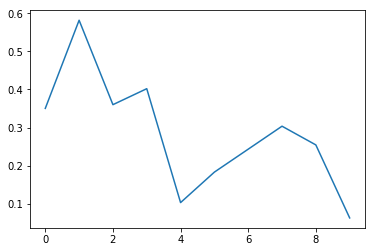

In [47]:
from scipy import stats
n=np.arange(0,10)
rate=1.5
y=stats.poisson.pmf(n,rate)
#y=np.random.exp(0.4,10)
noise=np.random.lognormal(0,0.1,10)
#y=y+noise
#noise=np.random.randint(50,size=(10))
#plt.plot(n,y+noise)
noise=abs(np.random.randn(10))
y=y+(noise)/5
plt.plot(n,y)

In [48]:
#time spent
from scipy import stats
def firstclick():
 n=np.arange(0,10)
 rate=1.5
 y=stats.poisson.pmf(n,rate)
#y=np.random.exp(0.4,10)
 noise=np.random.lognormal(0,0.1,10)
#y=y+noise
#noise=np.random.randint(50,size=(10))
#plt.plot(n,y+noise)
 noise=abs(np.random.randn(10))
 y=y+(noise)/5
 return y>0.3


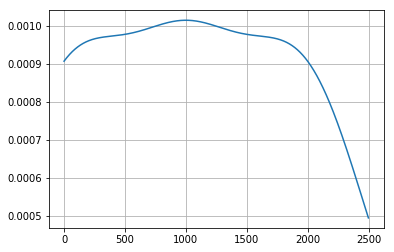

In [49]:

#time spent is a gaussian mixture model of three distributions with low, medium and high mean
x8=np.arange(0,2500,1)
y1=stats.norm.pdf(x8,2000,500)
y2=stats.norm.pdf(x8,1000,500)
y3=stats.norm.pdf(x8,0,500)
plt.grid(True)
t=y1+y2+y3
plt.plot(x8,t)
#plt.plot(x,y2)
#plt.plot(x,y3)

In [50]:
#Time distribution
def random_pick_timespent(some_list, probabilities):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(some_list, probabilities):
        cumulative_probability += item_probability
        if x < cumulative_probability: break
    return item
def timerandom_pick():
    timeli=[]
    for i in range(10):
        v=random_pick_timespent(x8,t)
        timeli.append(v)
    return timeli


[1100, 1200, 1000, 800, 1000, 900, 900, 600, 600, 600, 0, 300, 0, 200]


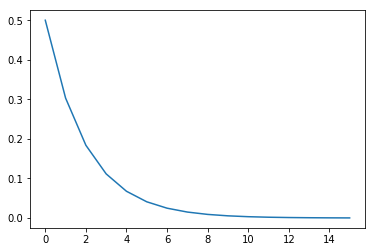

In [51]:
#users per session distribution
numusers=[]
q=0.5
p=[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
p=np.array(p)
o=q*np.exp(-q*p)
plt.plot(p,o)
def numu(i):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(p, o):
        cumulative_probability += item_probability
        if x < cumulative_probability: break
    return (15-item-i)*100
for i in range(20):
    f=numu(i)
    if(f<0):
        break
    numusers.append(f)
print(numusers)

In [ ]:
nus=[300,200,100]
import operator
our=pd.DataFrame(columns=['user','session','article','article rank','click','time spent'])
for b in nus:
    for l in range(1,b+1): #remember that first users keep on occuring only the last users are dropping out
        userid=[l]*10
        if l in list(our['user']):
            yesforuser=our.index[(our['click']==True) & (our['user']==l)].tolist()
            #print(l)
            
            oldtime=our['time spent'][yesforuser]
            articleliked=our['article'][yesforuser]
            #articleliked=list(our['article'][yesforuser])
            article_index=dict(zip(yesforuser,articleliked))
            time_index=dict(zip(yesforuser,oldtime)) 
            for key in time_index:
                time_index[key]=abs(tim[key]-time_index[key])
            mid=sorted(time_index.items(),key=operator.itemgetter(0),reverse=False)
            time_index=dict((h,g) for h, g in mid)
            clusterval=[]
            """for key in time_index:
                test=article_index[key]
                mn=0
                for val in clusclus:
                    if test in list(val):
                        clusterval.append(mn)
                    mn=mn+1"""
            artic=[]
            def reject_outliers(data):
                        m = 2
                        u = np.mean(data)
                        s = np.std(data)
                        filtered = [e for e in data if (e < u +  s )]
                        return list(filtered)
            if(len(list(time_index.values()))>1):
                #print("hey")
                ch=reject_outliers(list(time_index.values()))
            else:
                ch=list(time_index.values())
            #print(list(time_index.values()))
            #print(ch)
           
            for key in time_index:
                if(time_index[key] in ch):
                        dc=articles['Content'][key]
                        artic.append(diff1(dc))
            sugg=[]
            k=0
            while(len(sugg)<10):
                for z in artic:
                    if(z[k] in list(our.loc[our['user']==l]['article'])):
                        continue
                    else:
                        sugg.append(z[k])
                k=k+1
            article_id=sugg[0:10]
            session_id=[max(our.loc[our['user']==l]['session'])+1]*10
            click=firstclick()
            timespent=timerandom_pick()
            rank=[1,2,3,4,5,6,7,8,9,10]
    
        else:    
            article_id=artselran()
            #print(article_id)
            rank=[1,2,3,4,5,6,7,8,9,10]
            session_id=[1]*10
            click=firstclick()
            timespent=timerandom_pick()
            for i in range(0,10):
                if(click[i]==False):
                    timespent[i]=0
        our1=pd.DataFrame(columns=['user','session','article','article rank','click','time spent'])
        #print(len(article_id),len(session_id))
        our1['user']=userid
        our1['session']=session_id
        our1['article']=article_id
        our1['article rank']=rank
        our1['click']=click
        our1['time spent']=timespent
        our=our.append(our1)
    #print("next")
    our=our.reset_index(drop=True)

In [80]:
our[['article','session']][our['user']==1]

,article,session
0,474,1
1,571,1
2,883,1
3,228,1
4,3699,1
5,1046,1
6,3280,1
7,1562,1
8,651,1
9,499,1
